# Overview

`marketmaps` is a toolbox to explore markets in maps. Specifically, `marketmaps` 
provides tools to derive spatial representations of market actors' competitive positions (e.g., positions of firms, brands or products). 
 
This tutorial gives a 
high-level overview about the different tools available to do so.  

In general, raw (market) data is expected in the form of either higher-dimensional attribute vectors, or in the form of pairwise relationships. 

Given such data, `marketmaps` provides a flexible set of tools to process and manipulate the data, map it to lower-dimensional space, evaluate and explore the resultant market maps.


## Module Overview

`marketmaps` entails the following main modules:

1. `marketmaps.preprocessing`: Tools for preprocessing input data.
2. `marketmaps.mapping`: Tools for mapping input data to lower-dimensional space.
3. `marketmaps.printer`: Tools for drawing and annotating market maps.
4. `marketmaps.metrics`: Tools for evaluating market maps quantitatively.
5. `marketmaps.export`: Tools for exporting market maps for further usage. 

Besides, it includes the additional module:
6. `marketmaps.datasets`: example datasets used for these tutorials. 


## Example Application

For a quick high-level overview of how these modules work together, we generate a market map for a subsample of the TNIC data provided by Hoberg & Philips:


### Step 1: Getting the Relationship Data

For this quick example, we use the 'Text-Based Network Industry (TNIC)' data, developed by Hoberg & Philips. 
The original data is provided at https://hobergphillips.tuck.dartmouth.edu/. If you use these data, please cite the authors' work. 

Here, we use a smaller subsample taken from thes data included in the `marketmaps.datasets` module. 

In [1]:
from marketmaps.datasets import load_tnic_sample_small
tnic_sample = load_tnic_sample_small()

In [2]:
sim_mat = tnic_sample['matrix']
labels = tnic_sample['labels']
cluster = tnic_sample['cluster']

The main data consists of a symmetric matrix of pairwise similarities. 
Beyond, we provide firm labels and cluster memberships (derived via community detection). 

In [3]:
import numpy as np 
print("Smallest matrix entry: {0:.2f} \n Largest matrix entry: {1:.2f}".format(np.min(sim_mat), np.max(sim_mat)))
print("Similarity between {0} and {1}: {2:.2f}".format(labels[0], labels[6], sim_mat[0,6]))
print("Similarity between {0} and {1}: {2:.2f}".format(labels[0], labels[3], sim_mat[0,3]))

Smallest matrix entry: 0.00 
 Largest matrix entry: 0.10
Similarity between APPLE INC and MICROSOFT CORP: 0.06
Similarity between APPLE INC and EBAY INC: 0.00


In [4]:
labels

array(['APPLE INC', 'AT&T INC', 'COMCAST CORP', 'EBAY INC', 'HP INC',
       'INTUIT INC', 'MICROSOFT CORP', 'ORACLE CORP', 'US CELLULAR CORP',
       'WESTERN DIGITAL CORP'], dtype='<U20')

### Step 2: Preprocessing relationship data


Different mapping methods require different input data. Here, the input data connsists of *pairiwse similarities*. To map them to 2D space via Multidimensional Scaling, 
we require *pariwise distances*. Among other features, `marketmaps.preprocessing` provides various transformations between such different types of relationship data.

One simple way to do so is by mirroring:  

In [5]:
from marketmaps.preprocessing import sim2dist
dist_mat = sim2dist(sim_mat, transformation= 'mirror')
print("Smallest matrix entry: {0:.2f} \n Largest matrix entry: {1:.2f}".format(np.min(dist_mat), np.max(dist_mat)))
print("Distance between {0} and {1}: {2:.2f}".format(labels[0], labels[6], dist_mat[0,6]))
print("Distance between {0} and {1}: {2:.2f}".format(labels[0], labels[3], dist_mat[0,3]))

Smallest matrix entry: 0.00 
 Largest matrix entry: 0.10
Distance between APPLE INC and MICROSOFT CORP: 0.04
Distance between APPLE INC and EBAY INC: 0.10


### Step 3: Mapping relationship data to lower-dimensional space

The `marketmaps.mapping` provides implementations of multiple different mapping methods. 

Here, we apply (classic) Multidimensional Scaling (aka. Principal Coordinate Analysis):

In [6]:
from marketmaps.mapping import CMDS
model = CMDS(n_dims = 2).fit(dist_mat)
map_coords = model.Y

The resultant model output is a 2D array of shape (n_samples, 2) containing the map coordinates.

In [7]:
map_coords.shape

(10, 2)

### Step 4: Drawing market maps

`marketmaps.mapping` provides intuitive functions (such as ```draw_map()```), which can create highly customizable maps.  

<AxesSubplot:title={'center':'Classic Scaling of TNIC Data'}>

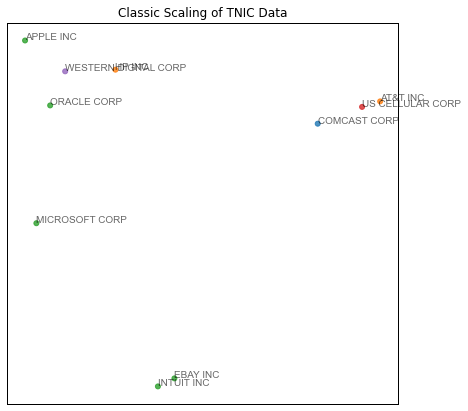

In [10]:
from marketmaps.printer import draw_map
draw_map(Y = map_coords,
        c = cluster,
        labels = labels,
        annotate = 'labels', 
        fig_size= (7,7),
        title_str = "Classic Scaling of TNIC Data")

### Step 5: Evaluating market maps

Further, `marketmaps.metrics` provides typically used metrics to evaluate the resultant maps' goodness-of-fit.  

In [9]:
from marketmaps.metrics import adjusted_hitrate_score 
score = adjusted_hitrate_score(dist_mat, map_coords, n_neighbors = 3, input_type= 'distance')

print("Hitrate of 3-nearest neighbor recovery (adjusted or random agreement): {0:.2f}".format(score))

Hitrate of 3-nearest neighbor recovery (adjusted or random agreement): 0.33


*** WORK IN PROGRESS: PROPERTY FITTING***